# CSII 2024 Exercise 11: Nonlinear Control Part 1
&copy; 2024 ETH Zurich, Felix Schnitzler, Jungcheng Fu, Dejan Milojevic, Paolo Petri, Joël Gmür; Institute for Dynamic Systems and Control; Prof. Emilio Frazzoli

## Description
This week's Jupyter notebook will cover feedback linearization and differential flatness.


As usual, we start by installing the `control` module and import the required libraries.

In [1]:
# Install the required python library with pip 
%pip install control

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: C:\Users\elias\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
import numpy as np
import control as ct
import control.flatsys as fs
import matplotlib.pyplot as plt

## Problem 1
You are an engineer on a racing team for Formula 1 and you are currently working on optimizing the drag force on your teams racecar. To model the vehicles behaviour you need to recall the equation for Drag force that you first learned about at ETH.
$$ F_{d} = \frac{1}{2}\rho c_d A\dot{x}(t)^2 , $$ 
where $\rho$ is the density of air, $c_d$ is the drag coefficient and $A$ is the affected reference area.
We model the total force $F_{tot}$ on the vehicle as the combination of the input acceleration $a_{m}$ and the drag force $F_d$:
$$ F_{tot} = m a_m - F_d$$
Writing this in familiar notation we get:
$$ m\ddot{x}(t) = -\frac{1}{2}\rho c_d A\dot{x}(t)^2 + mu(t)$$
Since we are interested in the velocity of the system, we can transform this into a first order differential equation by setting $v(t) = \dot{x}(t)$. The total system now reads:
\begin{align*}
\dot{v}(t) &= -\gamma v(t)^2 + u(t)\\
y(t) &= v(t)
\end{align*}
where $\gamma = \frac{1}{2m}\rho c_d A$ and $y(t)$ is the output of the system.


### Exercise 1.1

Define the nonlinear system in the function 'nonlinear_system' below. The function should take the state $x$, the input $u$ and the parameters $\gamma$ as arguments and return the derivative of the state $vdot$ as well as the output $y$.

In [3]:
gamma = 0.1

def nonlinear_sys(t, v, u, params=(gamma)):
  vdot = -gamma*v**2 + u
  return vdot

def nonlinear_sys_out(t, v, u, params=(None)):
  y = v
  return y

### Exercise 1.2

Using the control library, define the input-output system 'sys' and simulate the response of the system.
Hint: You can use the function ct.NonlinearIOSystem() to define 'sys'.

In [4]:
sys = ct.NonlinearIOSystem(nonlinear_sys, nonlinear_sys_out)

w = np.pi*2

t = np.linspace(0, 5, 1000)
u = np.sin(w * t) * 0 + 10


t_out, y_out = ct.input_output_response(sys, T=t, U=u, X0=[0])


Now we plot the data to see how the system behaves.

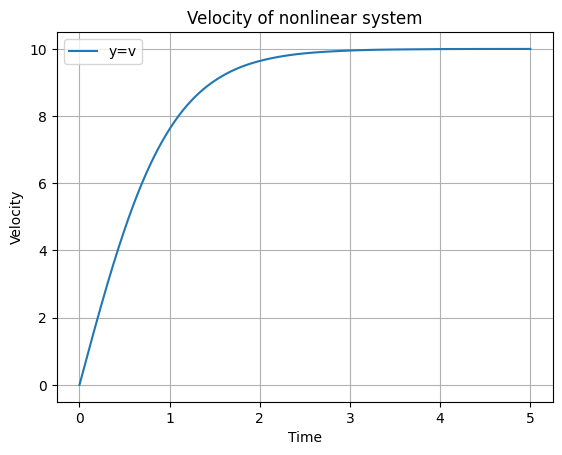

In [5]:
# Plot the response
plt.plot(t_out, y_out[0], label='y=v')  # theta output
plt.xlabel('Time')
plt.ylabel('Velocity')
plt.title('Velocity of nonlinear system')
plt.legend()
plt.grid(True)
plt.show()


### Exercise 1.3
Find the equilibrium point of the system and linearize the system around this point.


